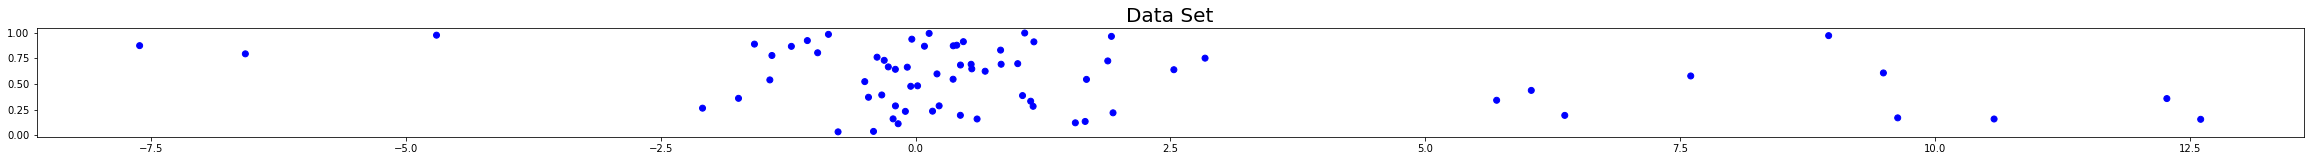

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.covariance import EllipticEnvelope

np.random.seed(500)
size_n  = 50
size_o  = 20
escala  = 10
data_x  = np.hstack((np.random.normal(size=size_n),np.random.normal(scale=escala,size=size_o)))
data_y  = np.random.uniform(size=size_n+size_o) # Uniforme 0> no hay outliers en este eje
muestra = np.empty((2,size_n+size_o))
muestra[0,:] = data_x
muestra[1,:] = data_y
cmask   = np.zeros(size_n+size_o)

def scatter(x,y,c,title="",Q1=0,Q3=0):
    hscl = x.max()-x.min()+0.1
    vsiz = 2
    fig, ax = plt.subplots(figsize=(hscl*vsiz,vsiz))
    ax.scatter(x, y, c=c, cmap='bwr')
    ax.set_title(title, fontsize=20)
    if (Q1!=Q3):
        plt.axvline(Q1, color='k')
        plt.axvline(Q3, color='k')
        plt.axvline(Q1-1.5*(Q3-Q1), color='k', linestyle='--')
        plt.axvline(Q3+1.5*(Q3-Q1), color='k', linestyle='--')
        
    plt.show()

scatter(data_x,data_y,cmask,title="Data Set")

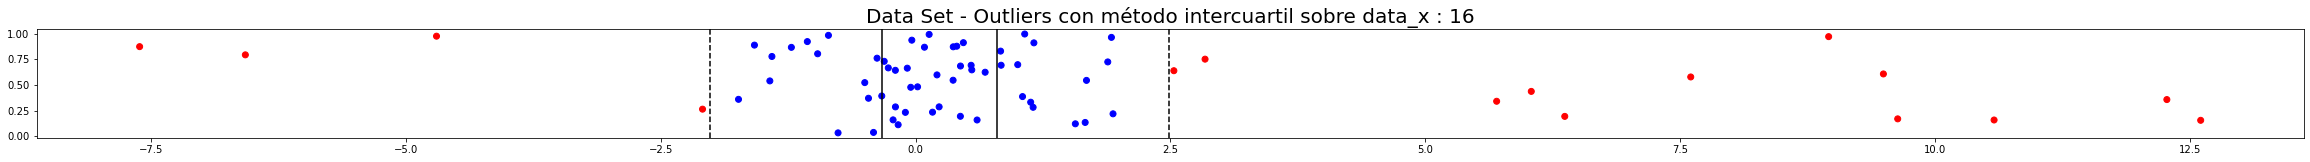

In [158]:
Q1  = stats.scoreatpercentile(data_x, 25)  # Primer cuartil
Q3  = stats.scoreatpercentile(data_y, 75)  # Tercer cuartil
IQR = Q3-Q1
ll  = Q1-1.5*IQR
lh  = Q3+1.5*IQR
cmask = cmask*0
cmask[np.where(data_x<ll)] = 1
cmask[np.where(data_x>lh)] = 1
scatter(data_x,data_y,cmask,title=f"Data Set - Outliers con método intercuartil sobre data_x : {int(sum(cmask))}",Q1=Q1,Q3=Q3)

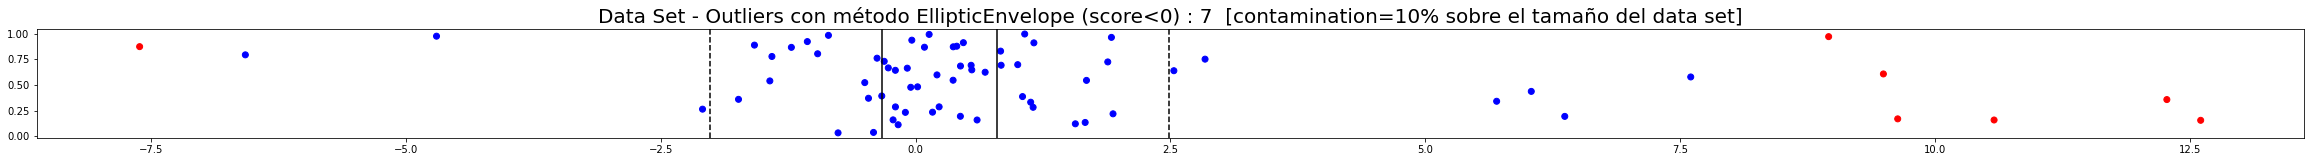

In [159]:
muestra = np.empty((size_n+size_o,2))
muestra[:,0] = data_x
muestra[:,1] = data_y
out_method   = EllipticEnvelope().fit(muestra)
scores       = out_method.decision_function(muestra)
cmask = cmask*0
cmask[np.where(scores<0)] = 1
scatter(data_x,data_y,cmask,title=f"Data Set - Outliers con método EllipticEnvelope (score<0) : {int(sum(cmask))}  [contamination=10% sobre el tamaño del data set]",Q1=Q1,Q3=Q3)

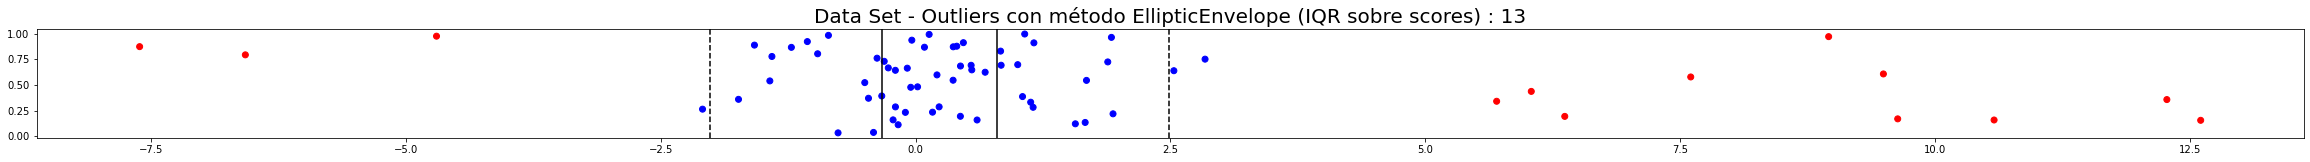

In [162]:
sQ1  = stats.scoreatpercentile(scores, 25)  # Primer cuartil scores
sQ3  = stats.scoreatpercentile(scores, 75)  # Tercer cuartil scores
sIQR = sQ3-sQ1
sll  = sQ1-1.5*sIQR
cmask = cmask*0
cmask[np.where(scores<sll)] = 1
scatter(data_x,data_y,cmask,title=f"Data Set - Outliers con método EllipticEnvelope (IQR sobre scores) : {int(sum(cmask))}",Q1=Q1,Q3=Q3)